# Projected quantum kernels

This notebook uses code from this github: https://github.com/DmitriiNabok/qksvm

In [1]:
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

from common import generate_moons_dataset
from common import visualize_decision_boundaries
from common import print_scores

from qksvm.QKSVC import QKSVC
from qksvm.QuantumFeatureMap import QuantumFeatureMap
from qksvm.ProjectedQuantumKernel import ProjectedQuantumKernel

seed = 12345

# Dataset

In [2]:
n = 500

In [6]:
def circle(samples, center=[0.0, 0.0], radius=np.sqrt(2 / np.pi)):
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0
        if np.linalg.norm(x - center) < radius:
            y = 1
        Xvals.append(x)
        yvals.append(y)

    return np.array(Xvals), np.array(yvals)

In [7]:
# Generate training and test data
num_training = 500
num_test = 500

Xdata, y_train = circle(num_training)
X_train = Xdata

Xtest, y_test = circle(num_test)
X_test = Xtest

# Quantum Kernel Estimation algorithm

C:\Users\Dean\anaconda3\lib\site-packages\qiskit\circuit\tools\pi_check.py:49: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  if not hasattr(inpt._symbol_expr, "expr_free_symbols"):
C:\Users\Dean\anaconda3\lib\site-packages\sympy\core\expr.py:2463: SymPyDeprecationWarning: 

The expr_free_symbols property is deprecated. Use free_symbols to get
the free symbols of an expression.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-expr-free-symbols
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  return {j for i in self.args for j in i.expr_free_symbols}


     ┌──────────────────────────┐                             ┌──────────────────────────┐ 
q_0: ┤ Rx(1.5707963267949*x[0]) ├──────────────■──────────────┤ Ry(1.5707963267949*x[1]) ├─
     ├──────────────────────────┤ ┌────────────┴─────────────┐└────────────┬─────────────┘ 
q_1: ┤ Rx(1.5707963267949*x[1]) ├─┤ Ry(1.5707963267949*x[0]) ├─────────────■───────────────
     └──────────────────────────┘ └──────────────────────────┘                             

Prediction Scores:

		Train	Test
Accuracy:	0.98	0.99
 ROC_AUC:	0.98	0.99



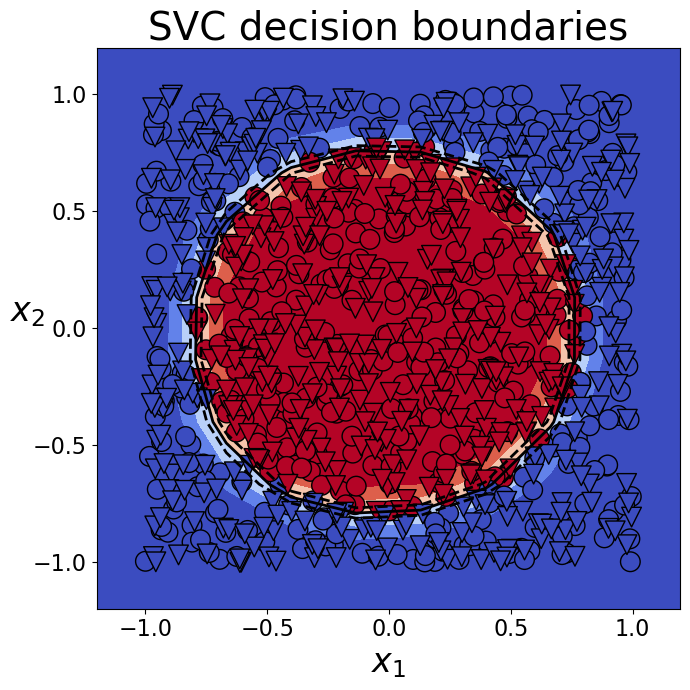

In [8]:
n_features = len(X_train[0])
n_qubits = 2
n_layers = 1

fm = QuantumFeatureMap(
    num_features=n_features, 
    num_qubits=n_qubits,
    num_layers=n_layers,
    alpha=np.pi/2,
    gates=['RX', 'CRY'], entanglement='ring',
)
print(fm.draw(plot_barriers=False, fold=150))

clf = QKSVC(feature_map=fm, C=1.0, random_state=seed)

clf.fit(X_train, y_train)
print_scores(clf, X_train, y_train, X_test, y_test)
visualize_decision_boundaries(clf, X_train, y_train, X_test, y_test)